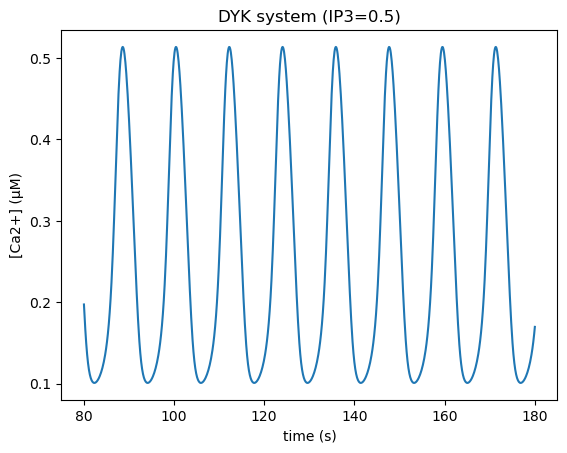

In [39]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.optimize import fsolve


# Parameters (from DYK 1992, Table 1)
c1 = 0.185
v1 = 6.0
v2 = 0.11
v3 = 0.9
k3 = 0.1
C0 = 2.0

a1, a2, a3, a4, a5 = 400.0, 0.2, 400.0, 0.2, 20.0

d1, d2, d3, d4, d5 = 0.13, 1.049, 0.9434, 0.1445, 0.08234

def P_open(C, IP3):
    """

    """
    numerator = C * IP3 * d2
    denominator = (C * IP3 + IP3 * d2 + d1*d2 + C*d3)*(C + d5)
   
    return (numerator/denominator)**3


def J1(C, CaER, IP3, Popen):
    return c1 * (v1 * Popen + v2) * (CaER - C)

def J2(C):
    return v3 * (C**2) / (C**2 + k3**2)

def rhs(t, y, IP3):
    C, x000, x010, x001 = y

    x110 = IP3 / d1 * x010

    x011 = (1 - x000 - x001 - x010) / (1 + IP3 / d1)

    V1 = a4*(C*x000-d4*x001)
    V2 = a4*(C*x010-d4*x011)
    V3 = a5*(C*x000-d5*x010)
    V4 = a5*(C*x001-d5*x011)

    dx000 = -V1 - V3
    dx010 = V3 - V2
    dx001 = V1 - V4

    Popen = x110**3   

    CaER = (C0 - C) / c1
    dCdt = J1(C, CaER, IP3, Popen) - J2(C)
    return [dCdt, dx000, dx010, dx001]

def gating_equations(vars, C, IP3):
    x000, x010, x001 = vars

    x110 = (IP3 / d1) * x010
    x011 = (1 - x000 - x001 - x010) 

    V1 = a4 * (C * x000 - d4 * x001)
    V2 = a4 * (C * x010 - d4 * x011)
    V3 = a5 * (C * x000 - d5 * x010)
    V4 = a5 * (C * x001 - d5 * x011)

    dx000 = -V1 - V3
    dx010 = V3 - V2
    dx001 = V1 - V4

    return [dx000, dx010, dx001]

C_init = 0.14 
guess = [0.9, 0.05, 0.05]
x000_ss, x010_ss, x001_ss = fsolve(gating_equations, guess, args=(C_init, IP3))



IP3 = 0.5
y0 = [C_init, x000_ss, x010_ss, x001_ss]
t_span = [0, 180]
burn_in = 80
mask = sol.t > burn_in
sol = solve_ivp(rhs, t_span, y0, args=(IP3,), max_step=0.1, rtol=1e-6, atol=1e-8)

plt.plot(sol.t[mask], sol.y[0][mask])
plt.xlabel("time (s)")
plt.ylabel("[Ca2+] (µM)")
plt.title("DYK system (IP3=0.5)")
plt.show()
